In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sheets = pd.read_excel('Data/Ne phase shift summary, 2018-10-24.xlsx', sheet_name=None)

for sheet in sheets.values():
    sheet.sort_values('Photon (eV)', inplace=True)
groupped = {
    k: v.groupby('Photon (eV)').mean()
    for k, v in sheets.items()
}

# All together

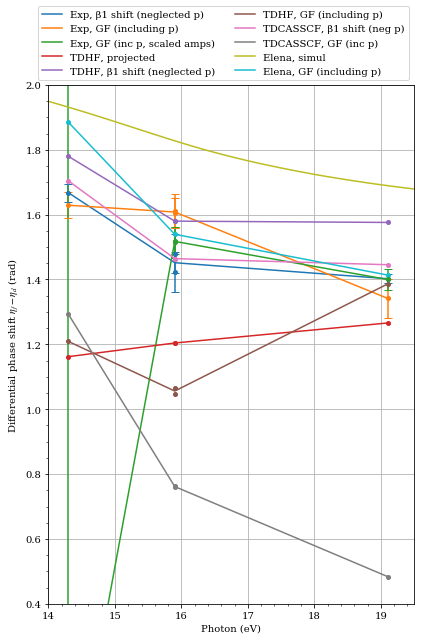

In [3]:
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 9))
plt.xlabel('Photon (eV)')
plt.ylabel(r'Differential phase shift $\eta_f-\eta_d$ (rad)')

prop = plt.rcParams['axes.prop_cycle']
for k, p in zip(sheets, prop):
    plt.plot([], '-', label=k, **p)
    plt.plot(groupped[k]['Phase shift (rad)'], '-', label='', **p)
    if 'Phase shift error (rad)' in sheets[k]:
        plt.errorbar(sheets[k]['Photon (eV)'],
                     sheets[k]['Phase shift (rad)'],
                     yerr=sheets[k]['Phase shift error (rad)'],
                     fmt='o', label='', **p)
    else:
        if not k.endswith("simul"):
            plt.plot(sheets[k]['Photon (eV)'], sheets[k]['Phase shift (rad)'], 'o', label='', **p)
plt.grid(True)
plt.legend(loc='lower right', bbox_to_anchor=(1, 1), ncol=2)
plt.xlim(14, 19.5)
plt.ylim(0.4, 2.0)
plt.tight_layout()
plt.savefig(f"Figures/Compare Ne phase shifts, all together.pdf")
plt.show()

# Read $\beta_1$ phase shift assuming that $p$-wave is neglectable

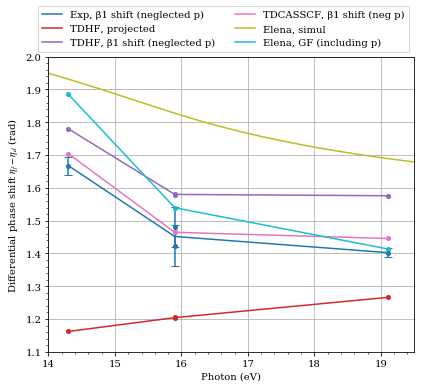

In [4]:
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 5.5))
plt.xlabel('Photon (eV)')
plt.ylabel(r'Differential phase shift $\eta_f-\eta_d$ (rad)')

prop = plt.rcParams['axes.prop_cycle']
for k, p in zip(sheets, prop):
    if not ('β1 shift' in k or 'Elena' in k or 'projected' in k):
        plt.plot([], '-', label='', **p)
        continue
    plt.plot([], '-', label=k, **p)
    plt.plot(groupped[k]['Phase shift (rad)'], '-', label='', **p)
    if 'Phase shift error (rad)' in sheets[k]:
        plt.errorbar(sheets[k]['Photon (eV)'],
                     sheets[k]['Phase shift (rad)'],
                     yerr=sheets[k]['Phase shift error (rad)'],
                     fmt='o', label='', **p)
    else:
        if not k.endswith("simul"):
            plt.plot(sheets[k]['Photon (eV)'], sheets[k]['Phase shift (rad)'], 'o', label='', **p)
plt.grid(True)
plt.legend(loc='lower right', bbox_to_anchor=(1, 1), ncol=2)
plt.xlim(14, 19.5)
plt.ylim(1.1, 2)
plt.tight_layout()
plt.savefig(f"Figures/Compare Ne phase shifts, beta1 phase shift.pdf")
plt.show()

# Globally fit all $\beta$ parameters (including $\omega$-only result)

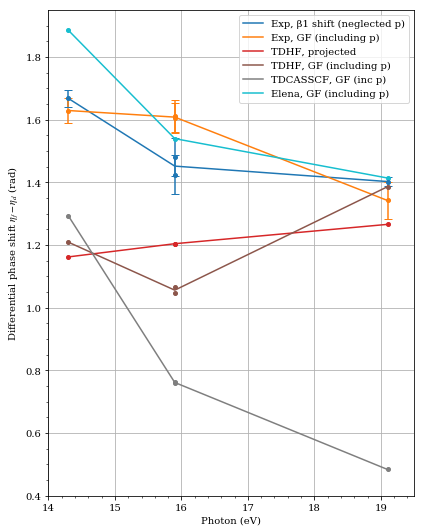

In [5]:
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 7.5))
plt.xlabel('Photon (eV)')
plt.ylabel(r'Differential phase shift $\eta_f-\eta_d$ (rad)')

prop = plt.rcParams['axes.prop_cycle']
for k, p in zip(sheets, prop):
    if not ('GF' in k or 'Exp, β1 shift' in k or 'projected' in k) or 'scaled amps' in k:
        plt.plot([], '-', label='', **p)
        continue
    plt.plot([], '-', label=k, **p)
    plt.plot(groupped[k]['Phase shift (rad)'], '-', label='', **p)
    if 'Phase shift error (rad)' in sheets[k]:
        plt.errorbar(sheets[k]['Photon (eV)'],
                     sheets[k]['Phase shift (rad)'],
                     yerr=sheets[k]['Phase shift error (rad)'],
                     fmt='o', label='', **p)
    else:
        if not k.endswith("simul"):
            plt.plot(sheets[k]['Photon (eV)'], sheets[k]['Phase shift (rad)'], 'o', label='', **p)
plt.grid(True)
plt.legend()
plt.xlim(14, 19.5)
plt.ylim(0.4, 1.95)
plt.tight_layout()
plt.savefig(f"Figures/Compare Ne phase shifts, global fit.pdf")
plt.show()

## Rescaled $\beta$ amplitudes

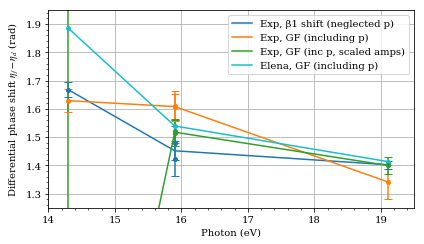

In [6]:
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 3.5))
plt.xlabel('Photon (eV)')
plt.ylabel(r'Differential phase shift $\eta_f-\eta_d$ (rad)')

prop = plt.rcParams['axes.prop_cycle']
for k, p in zip(sheets, prop):
    if not ('Exp' in k or 'Elena, GF' in k):
        plt.plot([], '-', label='', **p)
        continue
    plt.plot([], '-', label=k, **p)
    plt.plot(groupped[k]['Phase shift (rad)'], '-', label='', **p)
    if 'Phase shift error (rad)' in sheets[k]:
        plt.errorbar(sheets[k]['Photon (eV)'],
                     sheets[k]['Phase shift (rad)'],
                     yerr=sheets[k]['Phase shift error (rad)'],
                     fmt='o', label='', **p)
    else:
        if not k.endswith("simul"):
            plt.plot(sheets[k]['Photon (eV)'], sheets[k]['Phase shift (rad)'], 'o', label='', **p)
plt.grid(True)
plt.legend()
plt.xlim(14, 19.5)
plt.ylim(1.25, 1.95)
plt.tight_layout()
plt.savefig(f"Figures/Compare Ne phase shifts, rescaled beta amp.pdf")
plt.show()

# Project wave functions to spherical harmonics

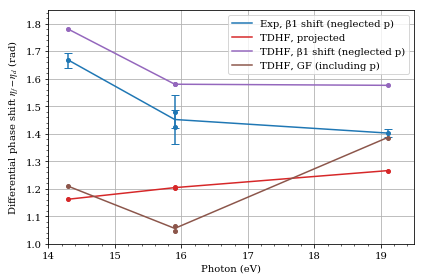

In [7]:
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 4))
plt.xlabel('Photon (eV)')
plt.ylabel(r'Differential phase shift $\eta_f-\eta_d$ (rad)')

prop = plt.rcParams['axes.prop_cycle']
for k, p in zip(sheets, prop):
    if not ('Exp, β1 shift' in k or 'TDHF' in k):
        plt.plot([], '-', label='', **p)
        continue
    plt.plot([], '-', label=k, **p)
    plt.plot(groupped[k]['Phase shift (rad)'], '-', label='', **p)
    if 'Phase shift error (rad)' in sheets[k]:
        plt.errorbar(sheets[k]['Photon (eV)'],
                     sheets[k]['Phase shift (rad)'],
                     yerr=sheets[k]['Phase shift error (rad)'],
                     fmt='o', label='', **p)
    else:
        if not k.endswith("simul"):
            plt.plot(sheets[k]['Photon (eV)'], sheets[k]['Phase shift (rad)'], 'o', label='', **p)
plt.grid(True)
plt.legend()
plt.xlim(14, 19.5)
plt.ylim(1, 1.85)
plt.tight_layout()
plt.savefig(f"Figures/Compare Ne phase shifts, projected.pdf")
plt.show()

# Alexei/Elena’s simulation and global fit

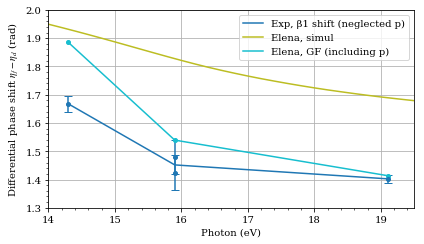

In [8]:
plt.style.use('Report.mplstyle')
plt.figure(figsize=(6, 3.5))
plt.xlabel('Photon (eV)')
plt.ylabel(r'Differential phase shift $\eta_f-\eta_d$ (rad)')

prop = plt.rcParams['axes.prop_cycle']
for k, p in zip(sheets, prop):
    if not ('Exp, β1 shift' in k or 'Elena' in k):
        plt.plot([], '-', label='', **p)
        continue
    plt.plot([], '-', label=k, **p)
    plt.plot(groupped[k]['Phase shift (rad)'], '-', label='', **p)
    if 'Phase shift error (rad)' in sheets[k]:
        plt.errorbar(sheets[k]['Photon (eV)'],
                     sheets[k]['Phase shift (rad)'],
                     yerr=sheets[k]['Phase shift error (rad)'],
                     fmt='o', label='', **p)
    else:
        if not k.endswith("simul"):
            plt.plot(sheets[k]['Photon (eV)'], sheets[k]['Phase shift (rad)'], 'o', label='', **p)
plt.grid(True)
plt.legend()
plt.xlim(14, 19.5)
plt.ylim(1.3, 2)
plt.tight_layout()
plt.savefig(f"Figures/Compare Ne phase shifts, Alexei & Elena.pdf")
plt.show()